# Census Income Project

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

# Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [151]:
#loading dataset
df=pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [152]:
#giving structural format to dataset
df=pd.DataFrame(data=df)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA(Exploratory Data Analysis):-

In [153]:
df.info()       #The information regarding the data type and null values present in the columns of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [154]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [155]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [156]:
df.shape

(32560, 15)

In [157]:
df.columns          # The names of all the columns present in the dataset

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

# Checking null values:

In [158]:
df.isnull().sum()                     #there are no null values in dataset

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

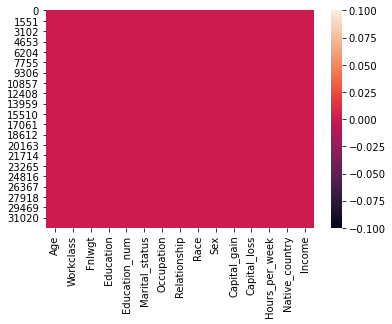

In [159]:
sns.heatmap(df.isnull())

In [160]:
df.nunique()                       #checking unique values

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

# Value count

In [161]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [162]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

<AxesSubplot:xlabel='Workclass', ylabel='count'>

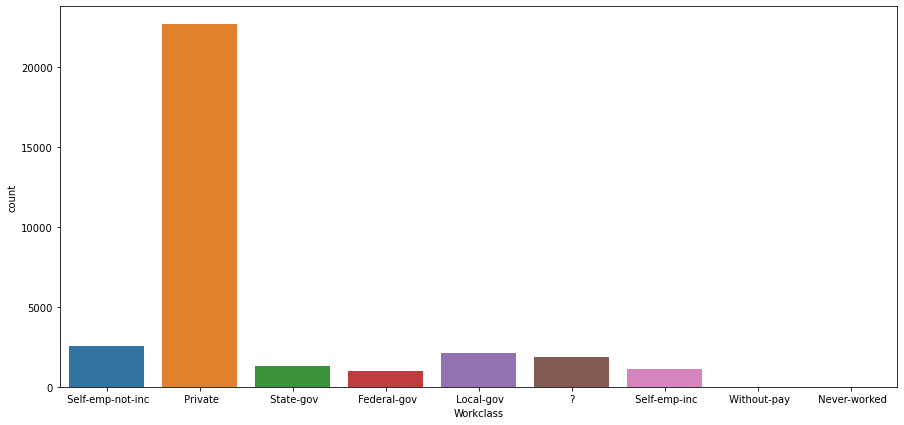

In [163]:
plt.figure(figsize=(15,7))
sns.countplot(df["Workclass"])

# Graphical representation of people present in each workclass 
# Most people belong to the private working class

In [164]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

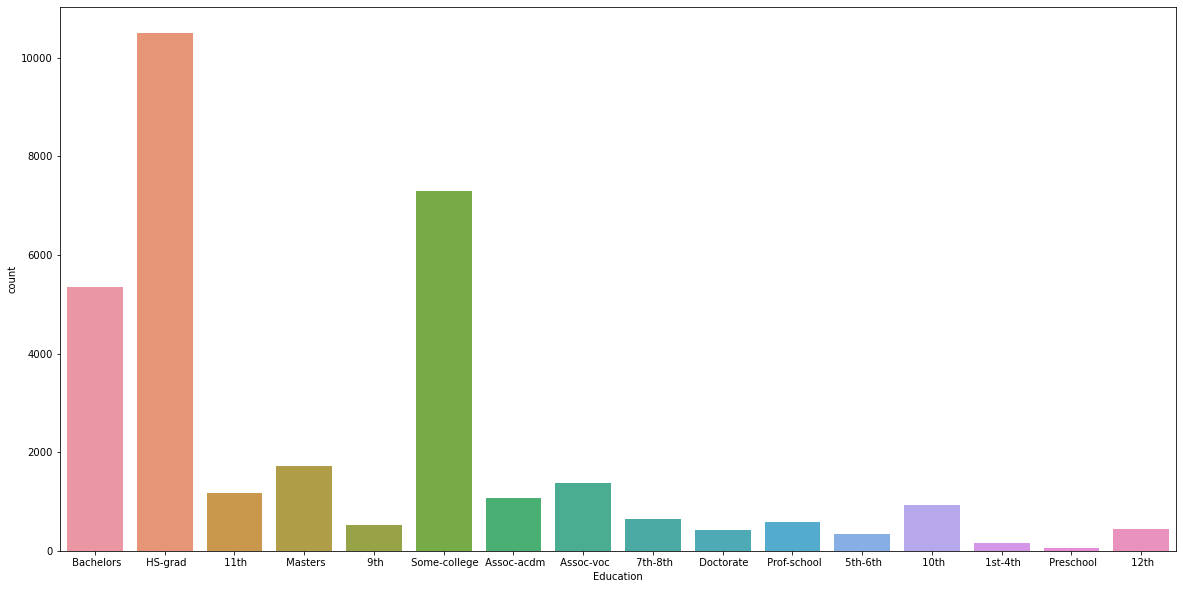

In [165]:
plt.figure(figsize=(20,10))
sns.countplot(df["Education"])

# Displaying the Education of the people working in different class
# Mostly people are from High School Graduation education background

In [166]:
df['Education_num'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

In [167]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

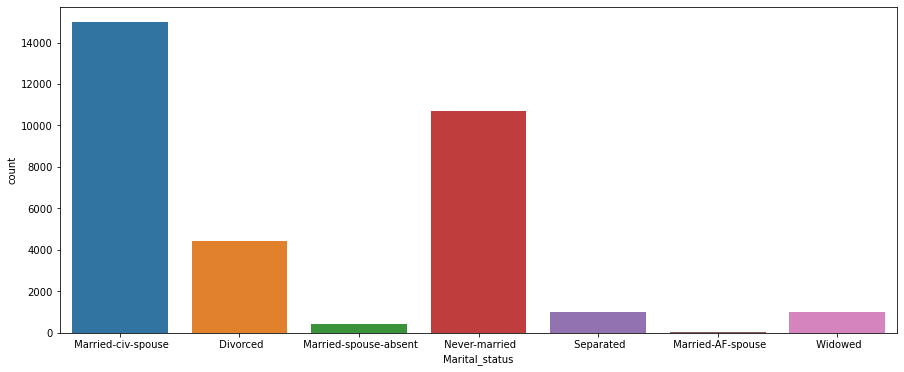

In [168]:
plt.figure(figsize=(15,6))
sns.countplot(df["Marital_status"])

# Displaying the Marital Status of the people working in different class
# Mostly people have married Civilian Spouse, while very few people have married Armed Forces spouse

In [169]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

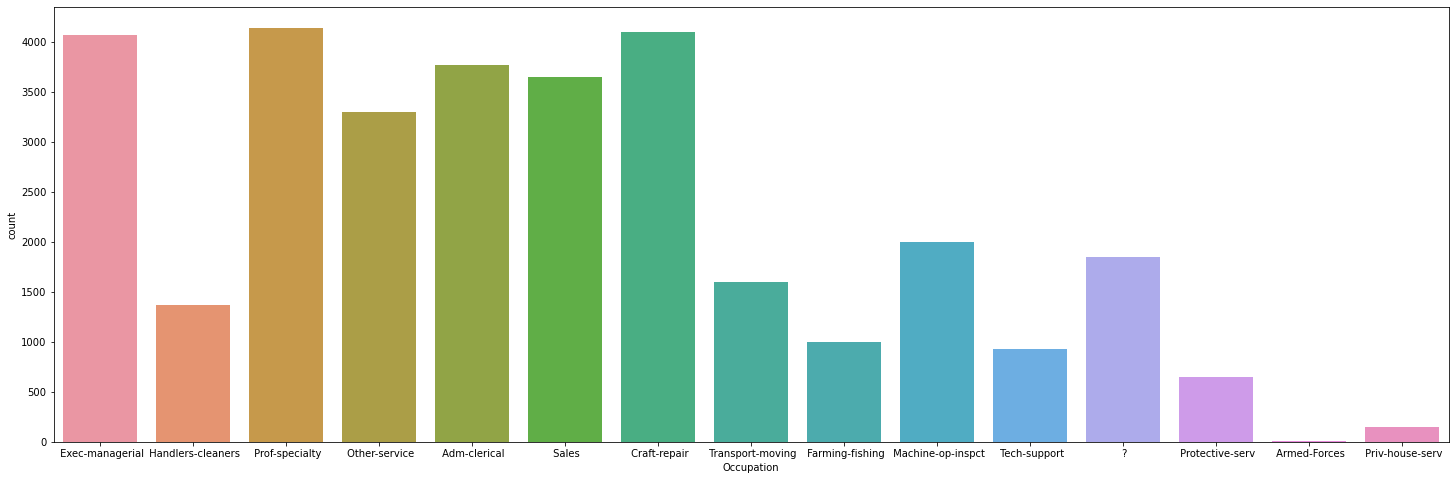

In [170]:
plt.figure(figsize=(25,8))
sns.countplot(df["Occupation"])

# Displaying the Occupation of the people working in different class
# Mostly people are working as craft repair, professor and Managerial Executive
# There are some people in "?" category which means their occupation is unknown according to the data

<AxesSubplot:xlabel='Relationship', ylabel='count'>

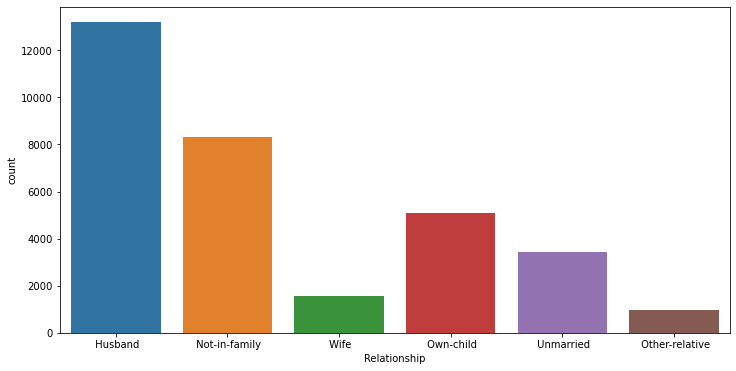

In [171]:
plt.figure(figsize=(12,6))
sns.countplot(df["Relationship"])

# Displaying the relationship of the people working in different class
# Most people are working Husbands
# Very Few people are working wives

<AxesSubplot:xlabel='Race', ylabel='count'>

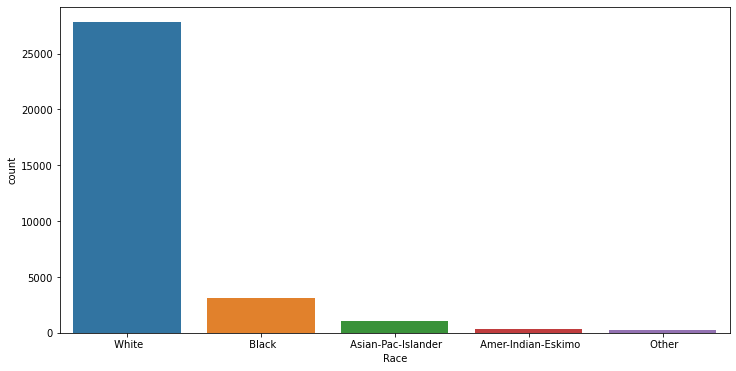

In [172]:
plt.figure(figsize=(12,6))
sns.countplot(df["Race"])

# Displaying the race of the people working in different class
# Most people in the dataset are white people while very few are of other races

<AxesSubplot:xlabel='Sex', ylabel='count'>

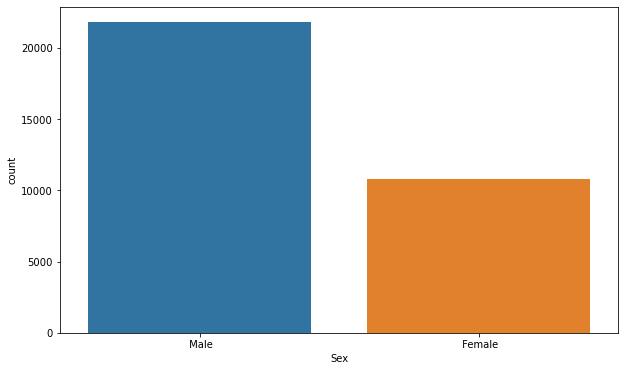

In [173]:
plt.figure(figsize=(10,6))
sns.countplot(df["Sex"])

# Displaying the TGender of the people working in different class
# As can be seen there are above 2 times male people working over working female

In [174]:
df["Native_country"].value_counts()

# Displaying Working people native countries
# Almost 80% people belong to United States while few belong to Mexico and "?" represents unknown native country
# Very few people are from other countries all over the world

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

<AxesSubplot:xlabel='Native_country', ylabel='count'>

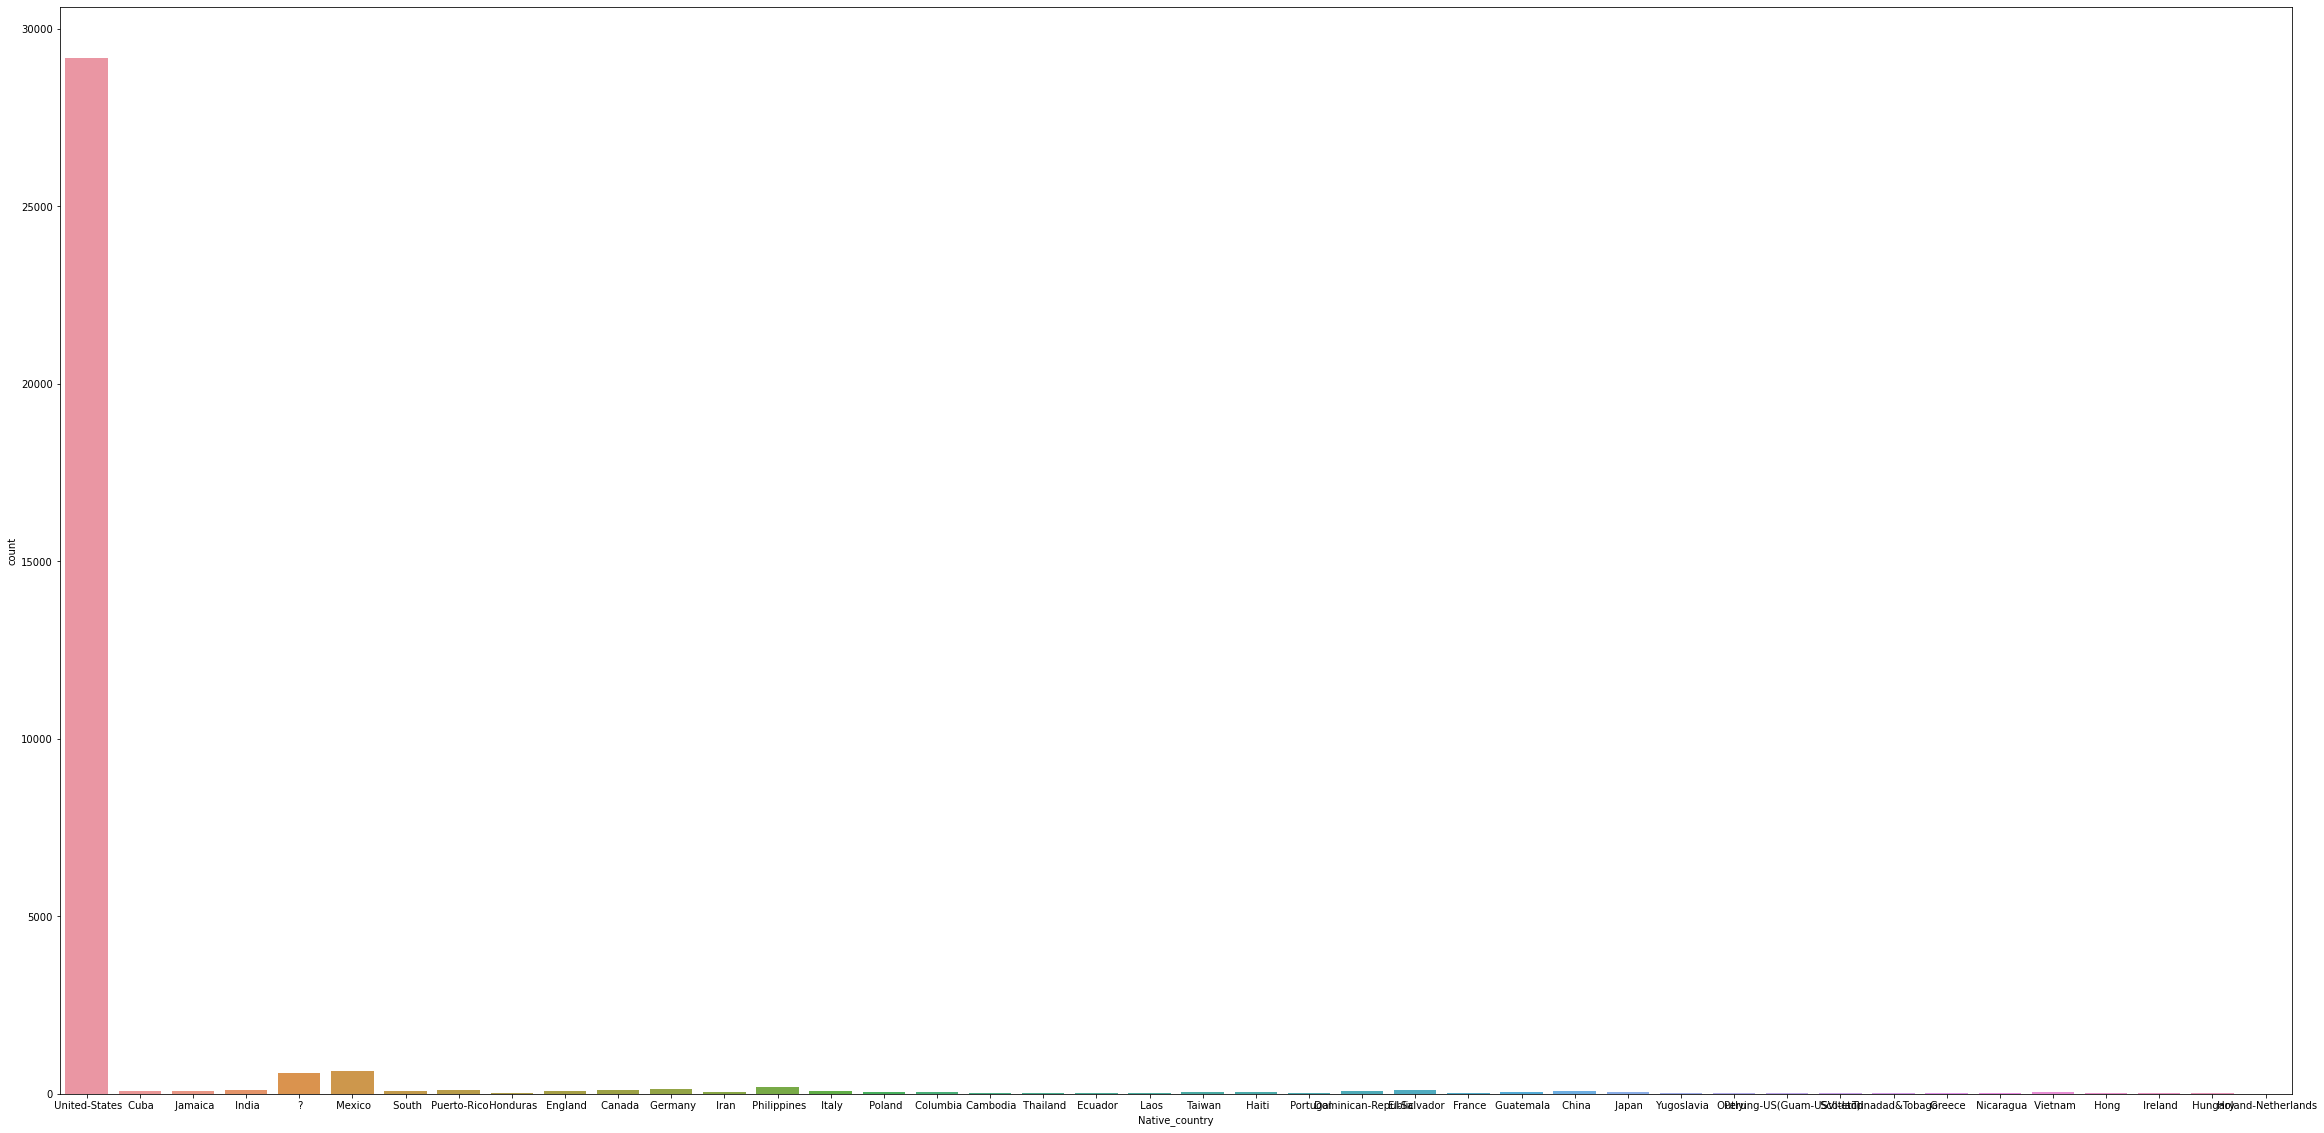

In [175]:
plt.figure(figsize=(40,20))
sns.countplot(df["Native_country"])

# Displaying the Native country of the people working in different class
# Most People are the natives of United States

In [176]:
df["Income"].value_counts()

# Showing the Income of the people working in different classes
# Most people have Income equal to or less than $50K

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

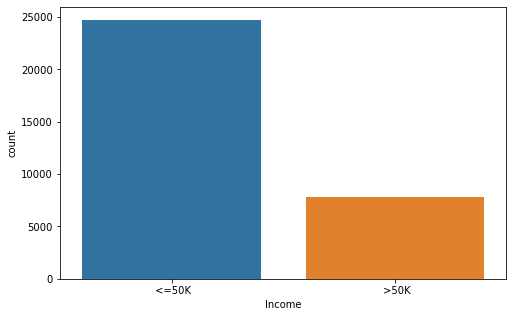

In [177]:
plt.figure(figsize=(8,5))
sns.countplot(df["Income"])

# Most people have Income equal to or less than $50K

<AxesSubplot:xlabel='Income', ylabel='count'>

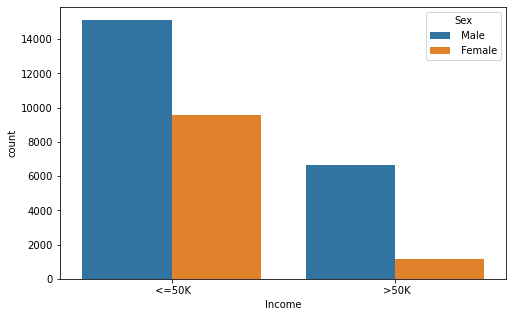

In [178]:
plt.figure(figsize=(8,5))
sns.countplot(df["Income"],hue=df["Sex"])

# Displaying the income category with respect to gender
# It is clearly shown that in both the categories there are many more males as compared to females

<AxesSubplot:xlabel='Race', ylabel='count'>

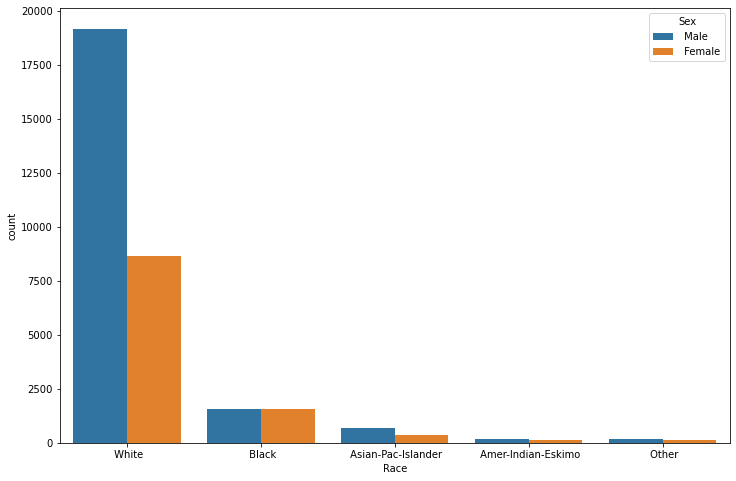

In [179]:
plt.figure(figsize=(12,8))
sns.countplot(df["Race"],hue=df["Sex"])

# Displaying the Race of working people with respect to their gender
# It can be seen that equal number of male and female work in black race
# In White race there is huge difference between working male and female

<AxesSubplot:xlabel='Occupation', ylabel='count'>

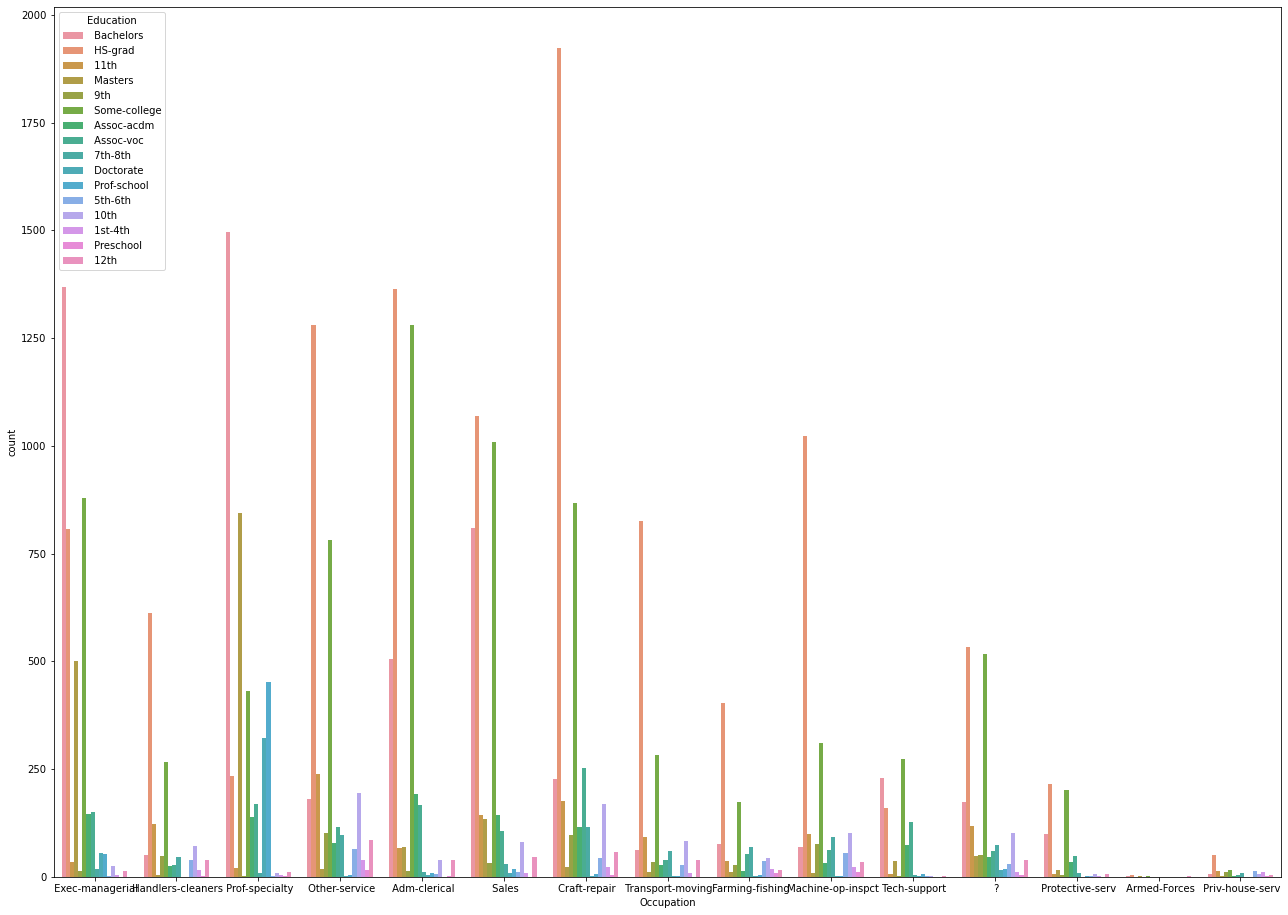

In [180]:
plt.figure(figsize=(22,16))
sns.countplot(df["Occupation"],hue=df["Education"])

# Graphical Representation showing Education of different occupation of working class people 
# As can be seen mostly Bachelors & High School Graduates are working in every occupation

<AxesSubplot:xlabel='Sex', ylabel='Hours_per_week'>

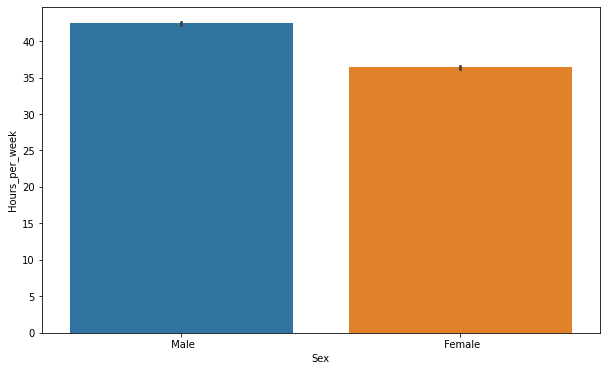

In [181]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Sex"],y=df["Hours_per_week"])

# Graphical Representation showing Males work more hours per week as compared to females

<AxesSubplot:xlabel='Sex', ylabel='Capital_gain'>

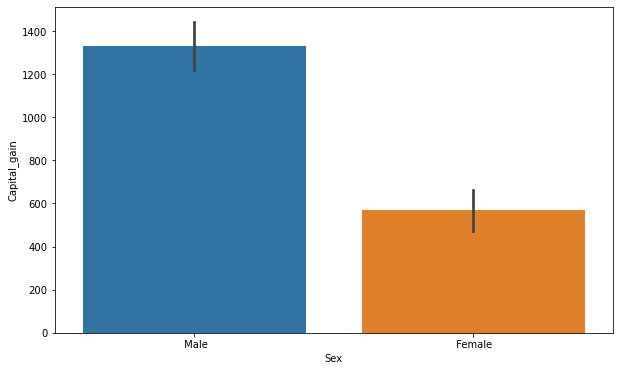

In [182]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Sex"],y=df["Capital_gain"])

# Graphical Representation shows that males have more capital gains as compared to females
# This means males have higher returns on investments

<AxesSubplot:xlabel='Sex', ylabel='Capital_loss'>

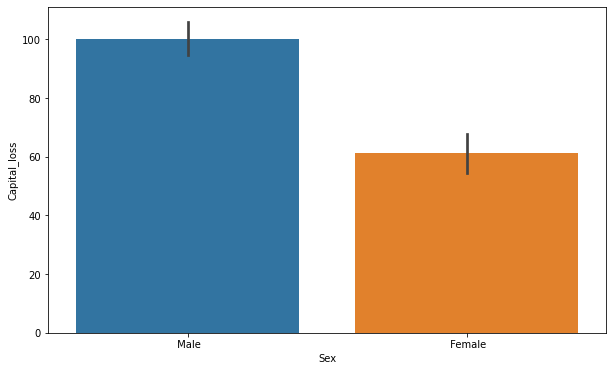

In [183]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Sex"],y=df["Capital_loss"])

# Graphical Representation shows that males have more capital loss as compared to females

In [184]:
df['Income'] = df.Income.replace({"<=50k":0,">50":1})#assigning the numerical values in Income column

In [185]:
df['Income']=pd.get_dummies(df['Income'])

In [186]:
df['Income'].value_counts()

1    24719
0     7841
Name: Income, dtype: int64

# Correlation of dataset:

In [187]:
corr =df.corr()

In [188]:
corr

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,-0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,-0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,-0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,-0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,-0.229690
Income,-0.234039,0.009481,-0.335182,-0.223333,-0.150523,-0.229690,1.000000


<AxesSubplot:>

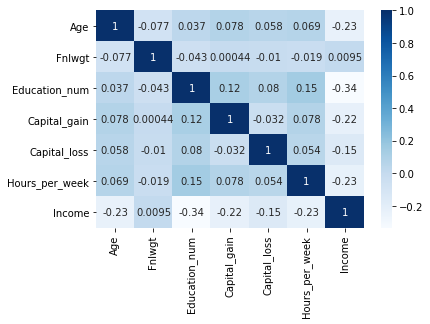

In [189]:
sns.heatmap(corr, annot=True,cmap="Blues")

# Outcome of correlation:

Only fnlwgt column is positively correlated to th target column and the correlation is 0.9%

# Describing dataset:

In [190]:
df.shape

(32560, 15)

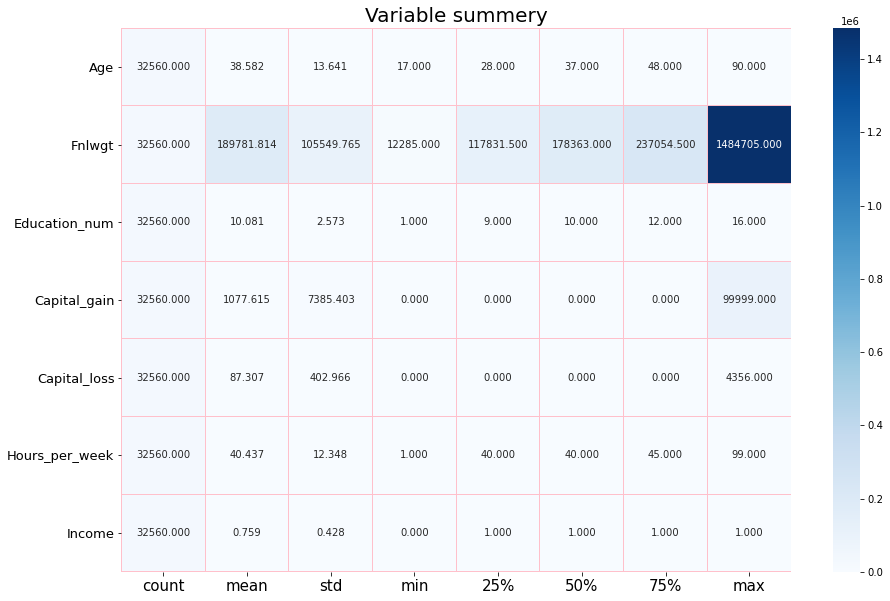

In [191]:
plt.figure(figsize=(15,10))
sns.heatmap(df.describe().transpose(),annot=True,fmt='.3f',linewidth=0.1,cmap='Blues',linecolor='pink')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title('Variable summery', fontsize=20)
plt.show()

# Outcome of describe of dataset:

From above we are determining mean, standard deviation, min. and max. value of each column, which will furthur help us 
in data cleaning.

Total number of rows and columns in dataset:

1.32560 rows

2.15 columns

Age:

     1.Mean=38.58
     2.std=13.64
     3.max_value=90
     4.min_value=17
Fnlwgt:

     1.Mean=189781.8
     2.std=105549.7
     3.max_value=1484705.0
     4.min_value=12285.0
Education_num:

     1.Mean=10.08
     2.std=2.57
     3.max_value=16
     4.min_value=1
Capital gain:

     1.Mean=1077.6
     2.std=7385.4
     3.max_value=99999.0
     4.min_value=0
Capital loss:

     1.Mean=87.3
     2.std=402.9
     3.max_value=4356.0
     4.min_value=0
Hours per week:

     1.Mean=40.4
     2.std=12.3
     3.max_value=99.0
     4.min_value=1.00
Income:

     1.Mean=0.75
     2.std=0.42
     3.max_value=1
     4.min_value=0

Income is our target column.

# Changing categorical data into integer form using LabelEncoder

In [192]:
from sklearn.preprocessing import LabelEncoder

In [193]:
le=LabelEncoder()

In [194]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i].values.reshape(-1,1))

In [195]:
df                #we can see that all the object data types are changed into numerical data types

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,1
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,1
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,1
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,1
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,0
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,1
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,1


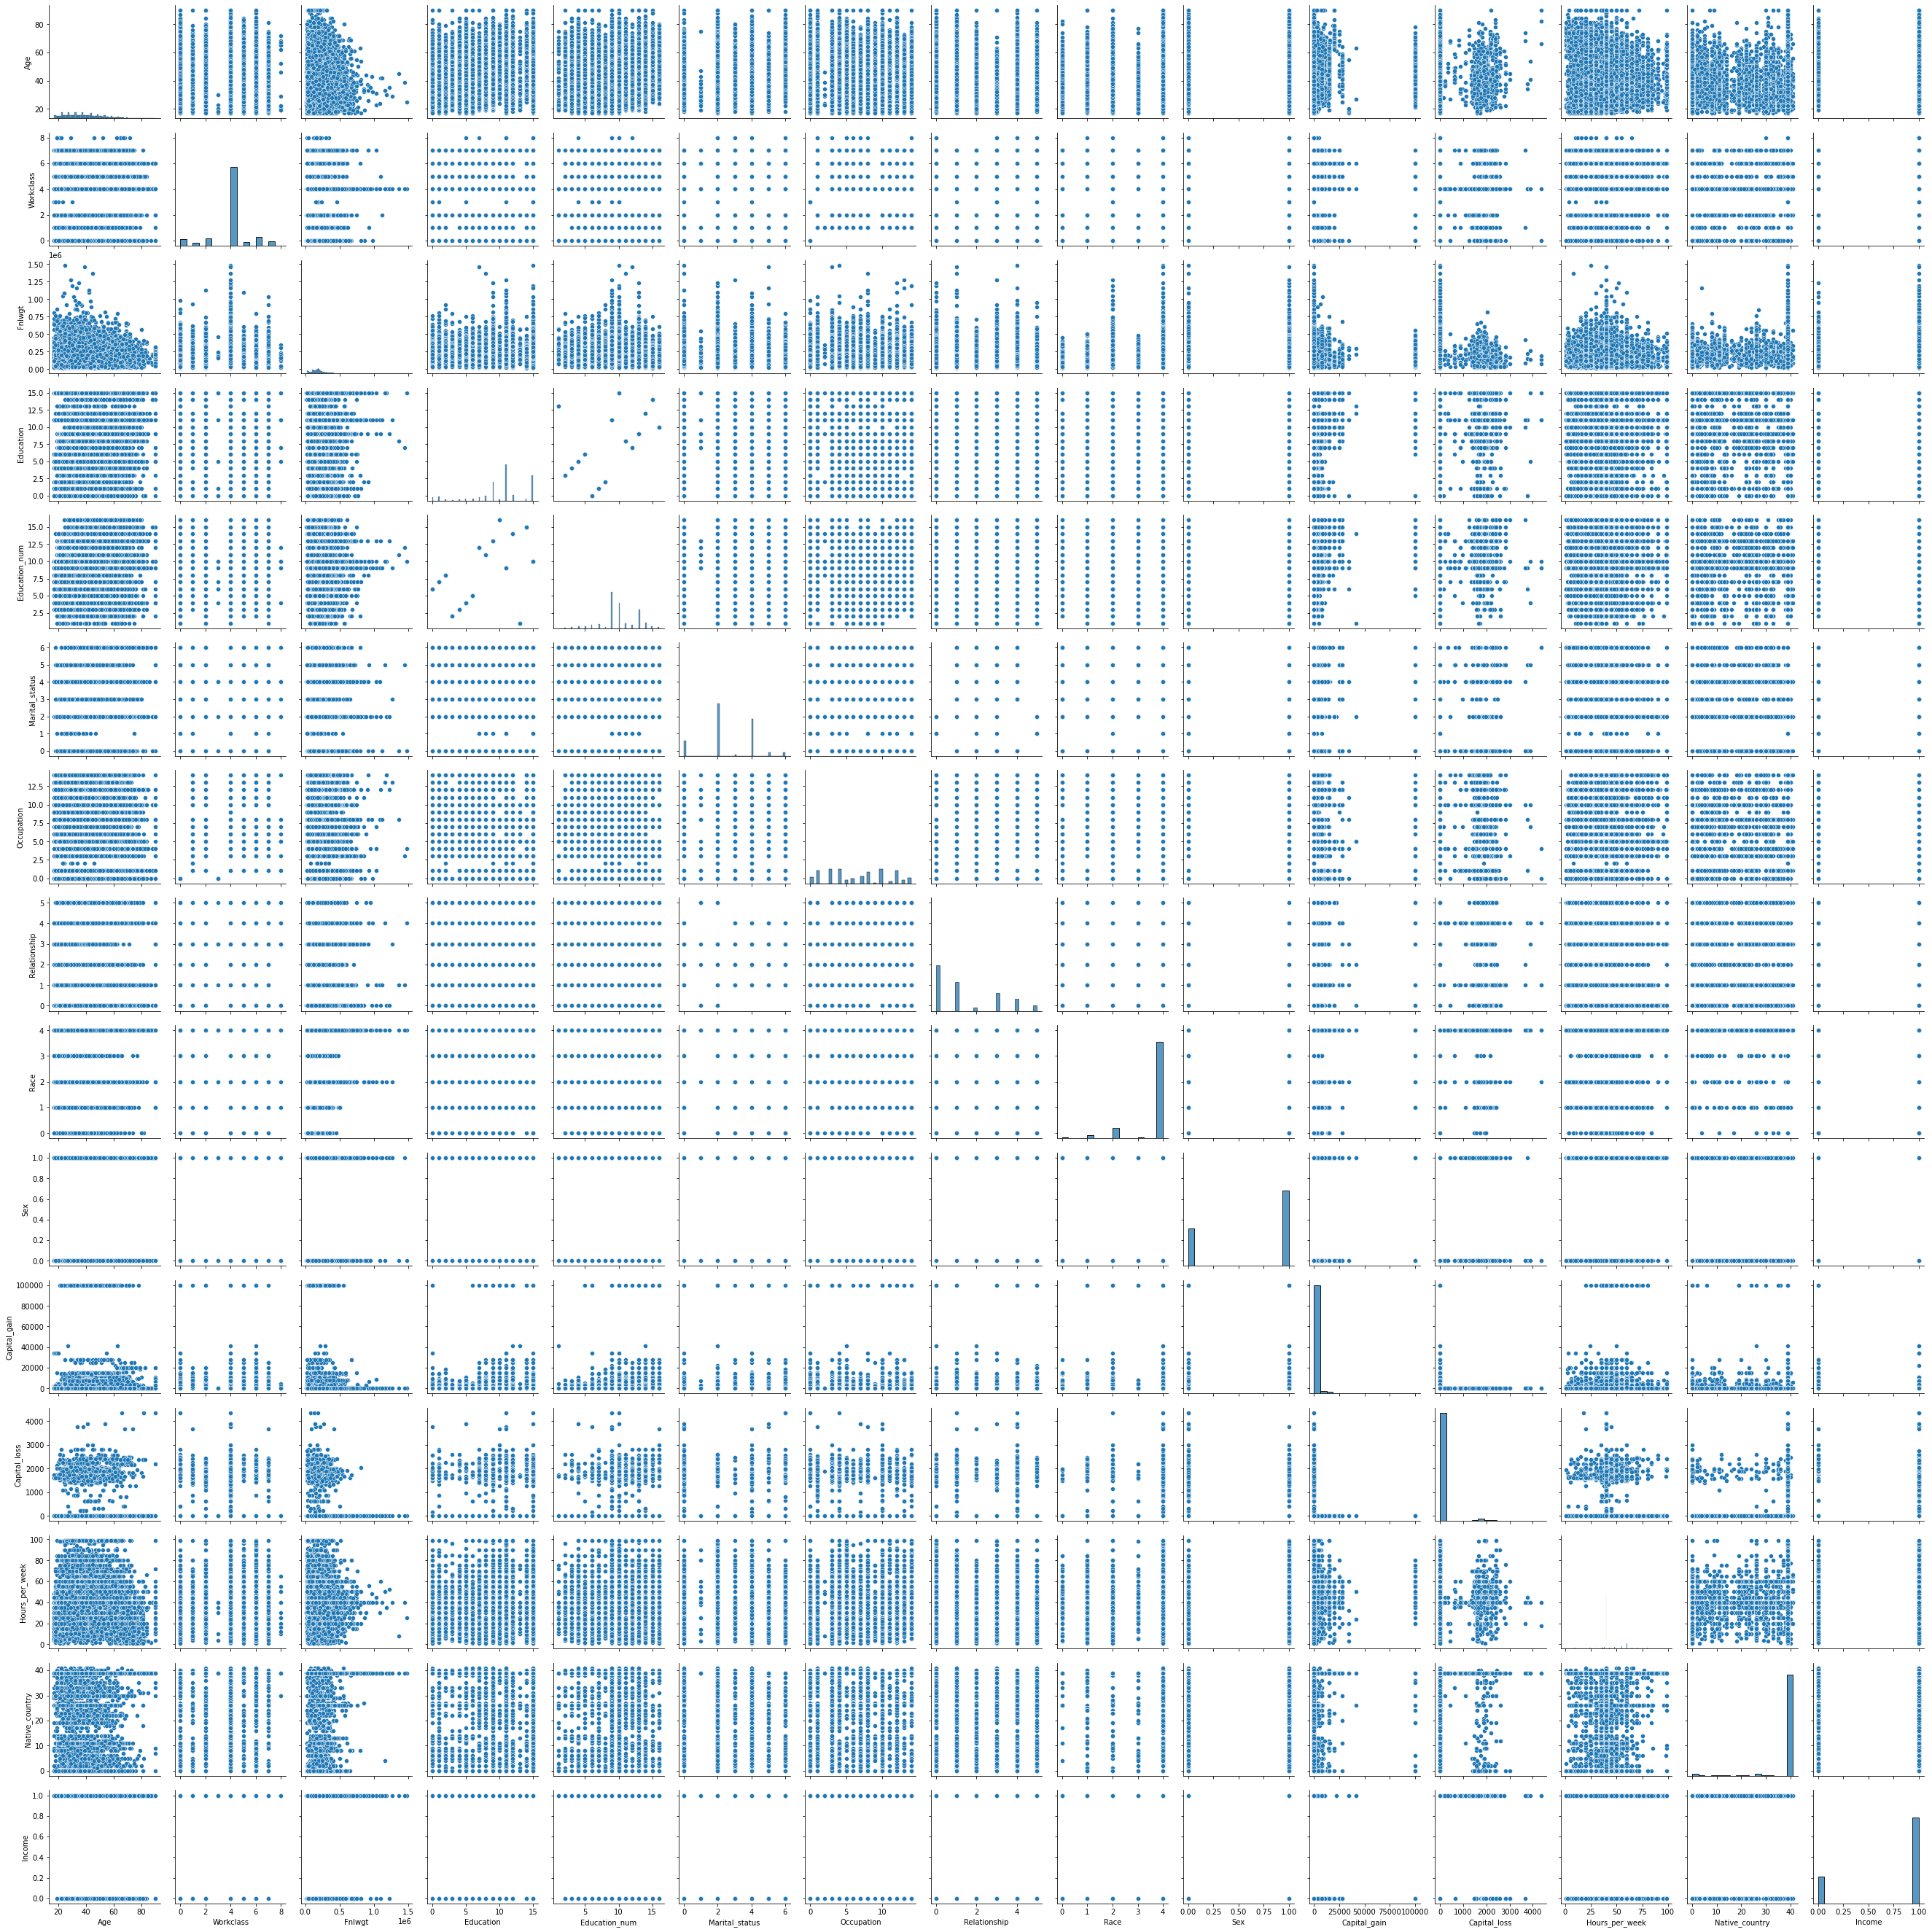

In [196]:
sns.pairplot(df)    # Using Multiariate Analysis on Dataset to check the correlation of all variables graphically

# Outlier detection:

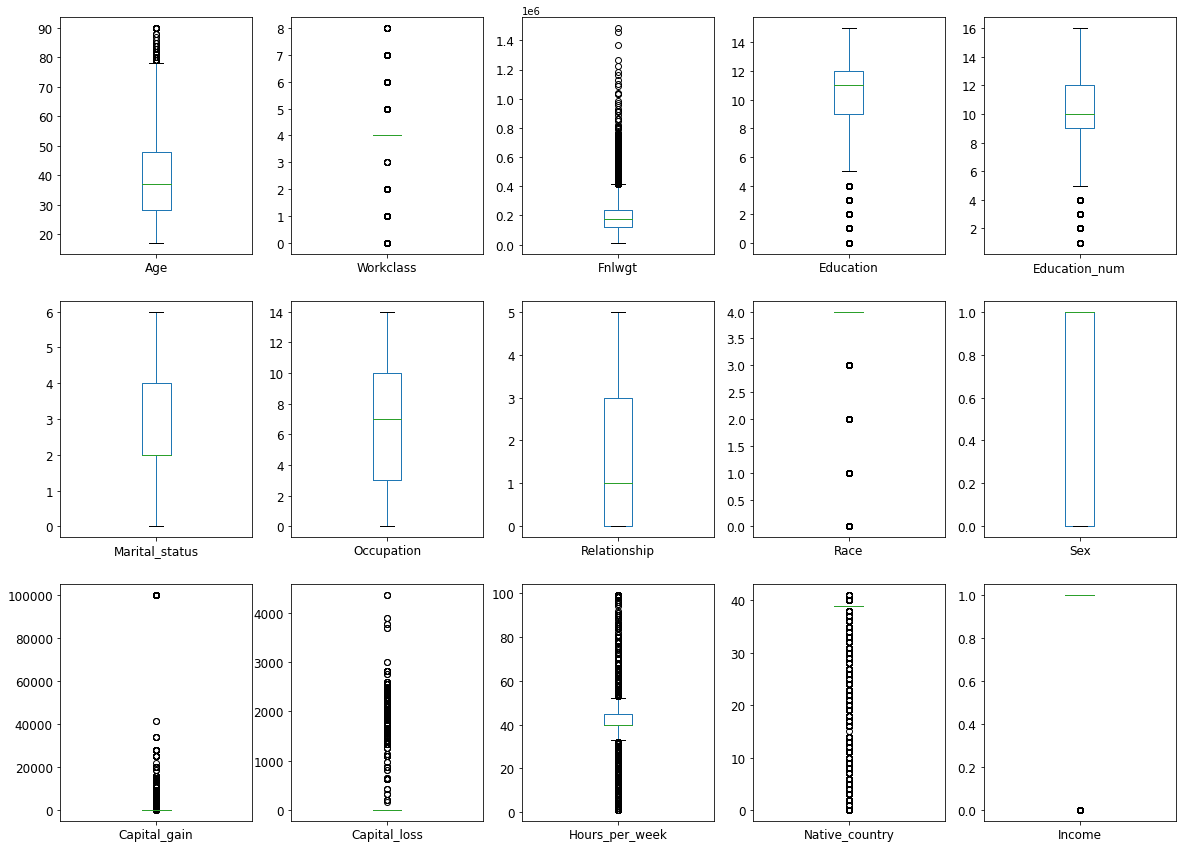

In [197]:
df.plot(kind="box", subplots=True, layout=(4,5), figsize=(20,20), fontsize=12)
plt.show()

# The Subplot shows boxplots of all the variable at once without passing boxplot function individually for each variable
# The boxplot shows the presence of many outliers in the numerical datatype columns such as capital gain & loss etc

As we can see that ther are many outliers in most of the columns 

# Checking distribution skewness:

<AxesSubplot:xlabel='Age', ylabel='Density'>

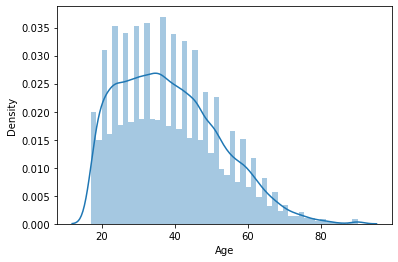

In [198]:
sns.distplot(df['Age'])      #data is not distributed normally and is highly skewed at right

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

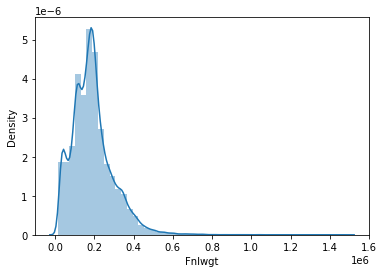

In [199]:
sns.distplot(df['Fnlwgt'])           #data is npot distributed normally and highly skewed at right

<AxesSubplot:xlabel='Education', ylabel='Density'>

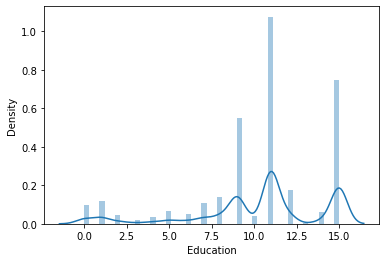

In [200]:
sns.distplot(df['Education'])            #data is highly skewed

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

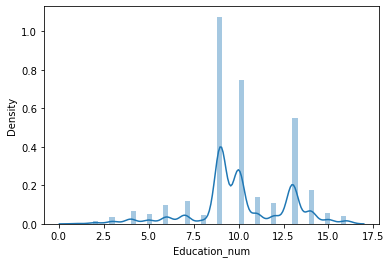

In [144]:
sns.distplot(df['Education_num'])         #data is not distributed normally

<AxesSubplot:xlabel='Race', ylabel='Density'>

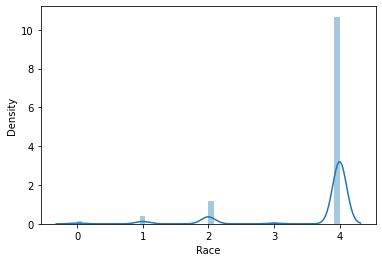

In [201]:
sns.distplot(df['Race'])           #data is skewed and not normally distributed

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

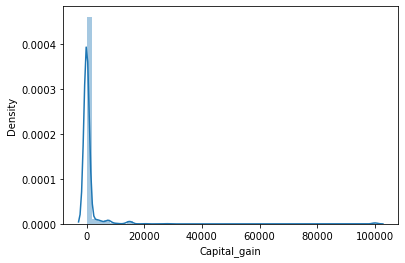

In [145]:
sns.distplot(df['Capital_gain'])          #data is highly skewed and not distributed normally

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

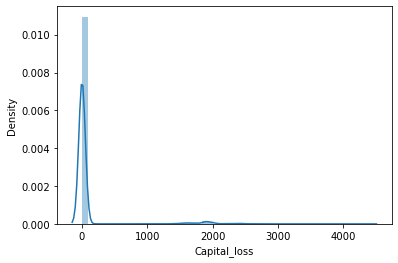

In [146]:
sns.distplot(df['Capital_loss'])             #data is highly skewed and not distributed normally

<AxesSubplot:xlabel='Hours_per_week', ylabel='Density'>

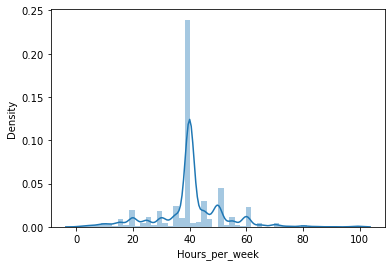

In [147]:
sns.distplot(df['Hours_per_week'])          #data is highly skewed and not distributed normally

In [202]:
df.skew()                   #checking the skewness

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income            -1.212383
dtype: float64

# Data Cleaning:

In [203]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,1
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,1
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,1
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,1
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,1
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,0
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,1
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,1


In [204]:
df.drop(columns=["Education_num","Fnlwgt","Native_country"],inplace=True)

# Dropping all the columns that do not correlate with the target variable income to increase model performance

In [205]:
df

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,2,4,0,4,1,0,0,13,1
1,38,4,11,0,6,1,4,1,0,0,40,1
2,53,4,1,2,6,0,2,1,0,0,40,1
3,28,4,9,2,10,5,2,0,0,0,40,1
4,37,4,12,2,4,5,4,0,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,2,13,5,4,0,0,0,38,1
32556,40,4,11,2,7,0,4,1,0,0,40,0
32557,58,4,11,6,1,4,4,0,0,0,40,1
32558,22,4,11,4,1,3,4,1,0,0,20,1


# Outlier Treatment:-

In [206]:
from scipy.stats import zscore                     #importing zscore to detect outliers

In [208]:
z = np.abs(zscore(df))     # Taking absolute of all the z score values so that negative values also become positive ones
z

array([[0.83709708, 1.46388339, 0.33544266, ..., 0.21666301, 2.22212013,
        0.5632099 ],
       [0.04264043, 0.09012148, 0.18131885, ..., 0.21666301, 0.03542999,
        0.5632099 ],
       [1.05703146, 0.09012148, 2.40248871, ..., 0.21666301, 0.03542999,
        0.5632099 ],
       ...,
       [1.42358875, 0.09012148, 0.18131885, ..., 0.21666301, 0.03542999,
        0.5632099 ],
       [1.21562378, 0.09012148, 0.18131885, ..., 0.21666301, 1.65520046,
        0.5632099 ],
       [0.98372   , 0.77700244, 0.18131885, ..., 0.21666301, 0.03542999,
        1.77553698]])

In [209]:
print(np.where(z>3))

# Printing all the integer locations of all the values where the z score value is above +3 Stanard Deviation
# These points determine the outliers present in the dataset

(array([    9,    10,    13, ..., 32532, 32550, 32552], dtype=int64), array([10,  6,  6, ...,  6,  6,  6], dtype=int64))


In [211]:
df_new=df[(z<3).all(axis=1)]
df_new

# Taking all the values which are under +3 Standard Deviation into new Data Frame "df_new"
# This dataset contains all the values and outliers are removed

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,6,9,2,4,0,4,1,0,0,13,1
1,38,4,11,0,6,1,4,1,0,0,40,1
2,53,4,1,2,6,0,2,1,0,0,40,1
3,28,4,9,2,10,5,2,0,0,0,40,1
4,37,4,12,2,4,5,4,0,0,0,40,1
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,2,13,5,4,0,0,0,38,1
32556,40,4,11,2,7,0,4,1,0,0,40,0
32557,58,4,11,6,1,4,4,0,0,0,40,1
32558,22,4,11,4,1,3,4,1,0,0,20,1


In [212]:
df.shape

(32560, 12)

In [213]:
df_new.shape

(29104, 12)

# Data_loss:

In [214]:
data_loss=((32560-29104)/32560)*100
data_loss

# Checking the Data loss which is 10.6%, Since the Data loss is very high we will not remove outliers

10.614250614250615

# Skewness Treatment :-

In [215]:
x=df.iloc[:,0:-1]
x

# Taking all the independent variables into x

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,50,6,9,2,4,0,4,1,0,0,13
1,38,4,11,0,6,1,4,1,0,0,40
2,53,4,1,2,6,0,2,1,0,0,40
3,28,4,9,2,10,5,2,0,0,0,40
4,37,4,12,2,4,5,4,0,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,7,2,13,5,4,0,0,0,38
32556,40,4,11,2,7,0,4,1,0,0,40
32557,58,4,11,6,1,4,4,0,0,0,40
32558,22,4,11,4,1,3,4,1,0,0,20


In [217]:
y=df.iloc[:,-1]
y

# Taking the target variable into y

0        1
1        1
2        1
3        1
4        1
        ..
32555    1
32556    0
32557    1
32558    1
32559    0
Name: Income, Length: 32560, dtype: uint8

In [218]:
x.skew()

# Checking the Skewness of the Dataset

Age                0.558738
Workclass         -0.752280
Education         -0.934063
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [219]:
# Checking the skewness of all independent variables
# Mostly all columns are highly skewed, Normal Range = +0.5 to -0.5

# Skewness Treatment:

In [220]:
from sklearn.preprocessing import power_transform

# Importing the power_transform function to reduce the over skewness in dataset

In [221]:
x_new=power_transform(x)
df_new=pd.DataFrame(x_new,columns=x.columns)

# Applying power_transform function and making new data frame of modified skewness dataset

In [222]:
df_new.skew()
# New and improved skewness is what we are getting after applying power_transform function

Age              -0.013897
Workclass         0.061629
Education        -0.309431
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
dtype: float64

In [223]:
x=df_new 

# Saving the df_new variable in x as it contains the transformed data 

In [224]:
y

0        1
1        1
2        1
3        1
4        1
        ..
32555    1
32556    0
32557    1
32558    1
32559    0
Name: Income, Length: 32560, dtype: uint8

In [225]:
x.shape

(32560, 11)

In [226]:
y.shape

(32560,)

In [227]:
x

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week
0,0.891947,1.644223,-0.477012,-0.383427,-0.502825,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-2.221515
1,0.102717,0.011864,0.090482,-1.782434,-0.013085,0.134511,0.412893,0.703087,-0.301370,-0.221213,-0.035570
2,1.064381,0.011864,-2.067600,-0.383427,-0.013085,-1.094635,-2.431920,0.703087,-0.301370,-0.221213,-0.035570
3,-0.731663,0.011864,-0.477012,-0.383427,0.829763,1.549018,-2.431920,-1.422298,-0.301370,-0.221213,-0.035570
4,0.028023,0.011864,0.395133,-0.383427,-0.502825,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.035570
...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.827983,0.011864,-0.984718,-0.383427,1.386870,1.549018,0.412893,-1.422298,-0.301370,-0.221213,-0.197550
32556,0.247374,0.011864,0.090482,-0.383427,0.211660,-1.094635,0.412893,0.703087,-0.301370,-0.221213,-0.035570
32557,1.334556,0.011864,0.090482,2.171784,-1.415274,1.351388,0.412893,-1.422298,-0.301370,-0.221213,-0.035570
32558,-1.358341,0.011864,0.090482,0.919719,-1.415274,1.091081,0.412893,0.703087,-0.301370,-0.221213,-1.654992


# Applying standard scaler:

In [228]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.89194656,  1.64422286, -0.47701209, ..., -0.30136989,
        -0.2212132 , -2.22151541],
       [ 0.10271741,  0.01186427,  0.09048172, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [ 1.06438077,  0.01186427, -2.06759959, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       ...,
       [ 1.33455599,  0.01186427,  0.09048172, ..., -0.30136989,
        -0.2212132 , -0.03557001],
       [-1.35834147,  0.01186427,  0.09048172, ..., -0.30136989,
        -0.2212132 , -1.65499204],
       [ 1.00782289,  0.79430139,  0.09048172, ...,  3.31823374,
        -0.2212132 , -0.03557001]])

In [229]:
y.value_counts()

1    24719
0     7841
Name: Income, dtype: int64

# Varifying class imbalance

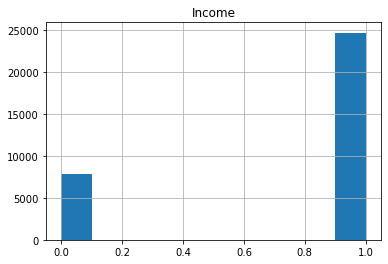

In [230]:
y.hist(grid=True)
plt.title('Income')
plt.show()

There is huge difference in both the classes, we can see large difference of class imbalance

# Applying SMOTE:

In [231]:
from imblearn.over_sampling import SMOTE

In [232]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

Resampling the x and y to make the class balanced and saving the new x and y in x and y again

In [233]:
y.value_counts()                 # Now we can see that both the classes are balanced without losing any data

0    24719
1    24719
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

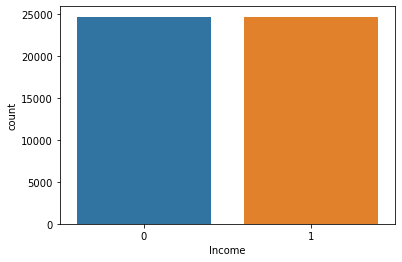

In [234]:
sns.countplot(y)                 # Now we can see that both the classes are balanced without losing any data

In [235]:
x.shape

(49438, 11)

In [236]:
y.shape

(49438,)

# Model Building:

# finding the random state:

In [237]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Importing the Algorithm and Evolution Matrix to perform Classification

In [240]:
maxAccu=0
maxRS=0

for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print('Best accuracy score is: ', maxAccu, 'at random state: ', maxRS)

Best accuracy score is:  0.7621359223300971 at random state:  407


we found our best random state 407, we will create our train test split using this random state

# Creating train test split

In [241]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=407)

In [242]:
x_train.shape

(34606, 11)

In [243]:
x_test.shape

(14832, 11)

In [244]:
y_train.shape

(34606,)

In [245]:
y_test.shape

(14832,)

# Logistic Regression

In [246]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score:", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score: 76.2135922330097
[[6028 1433]
 [2095 5276]]
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      7461
           1       0.79      0.72      0.75      7371

    accuracy                           0.76     14832
   macro avg       0.76      0.76      0.76     14832
weighted avg       0.76      0.76      0.76     14832



# Decision tree classifier:

In [247]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,preddtc)*100)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score:  85.81445523193096
[[6477  984]
 [1120 6251]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7461
           1       0.86      0.85      0.86      7371

    accuracy                           0.86     14832
   macro avg       0.86      0.86      0.86     14832
weighted avg       0.86      0.86      0.86     14832



# Random forest classifier:

In [248]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy score:", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score: 89.0844120819849
[[6702  759]
 [ 860 6511]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      7461
           1       0.90      0.88      0.89      7371

    accuracy                           0.89     14832
   macro avg       0.89      0.89      0.89     14832
weighted avg       0.89      0.89      0.89     14832



# KNeighbors Classifier:

In [250]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,predknn)*100)
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

Accuracy score:  84.5334412081985
[[6821  640]
 [1654 5717]]
              precision    recall  f1-score   support

           0       0.80      0.91      0.86      7461
           1       0.90      0.78      0.83      7371

    accuracy                           0.85     14832
   macro avg       0.85      0.84      0.84     14832
weighted avg       0.85      0.85      0.84     14832



# Support vector classifier:

In [251]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy score: ", accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score:  80.85221143473571
[[6655  806]
 [2034 5337]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.82      7461
           1       0.87      0.72      0.79      7371

    accuracy                           0.81     14832
   macro avg       0.82      0.81      0.81     14832
weighted avg       0.82      0.81      0.81     14832



from above models we can see that:

       Accuracy score of Logistic regression:            76.2%

       Accuracy score of Decision tree classification:   85.8%

       Accuracy score of Random forest classifier:       89.0%

       Accuracy score of KNeighbors classifier:          84.5% 
    
       Accuracy score of Support Vector Classifier:      80.8%

# CROSS VALIDATION:

In [252]:
from sklearn.model_selection import cross_val_score

In [253]:
scr1=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model is: ", scr1.mean())

Cross validation score of Logistic Regression model is:  0.752498313875597


In [254]:
scr2=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree classifier model is: ", scr2.mean())

Cross validation score of Decision Tree classifier model is:  0.8516742487028994


In [255]:
scr3=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest classifier is: ", scr3.mean())

Cross validation score of Random Forest classifier is:  0.8866269918034959


In [256]:
scr4=cross_val_score(knn,x,y,cv=5)
print("Cross validation score of KNeighbors classifier is: ", scr4.mean())

Cross validation score of KNeighbors classifier is:  0.8430765751699709


In [257]:
scr5=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of Support Vector classifier is: ", scr5.mean())

Cross validation score of Support Vector classifier is:  0.8044622723834344


# Random forest model is performing well as it has high cross val score of 88.6% and high accuracy score of 89.0%. (or least diff between cross val score and accuracy score. i.e, 0.4 %)

# Hyper parameter tunning:

In [260]:
from sklearn.model_selection import GridSearchCV
# Importing the GridSearchCV to get the best parameters of the Random Forest Classifier model

#creating parameter list to pass in GridSearchCV
#parameters are different for different models
#for random forest classifier i am using these

parameters={"max_depth":np.arange(2,10), 
           "criterion":["gini","entropy"],
          "min_samples_split":np.arange(2,10),
           "min_samples_leaf":np.arange(2,10)}


# Setting the Parameters to apply to GridSearchCV to get the best parameter score

In [261]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")

GCV.fit(x_train,y_train)         #fitting data in model

GCV.best_params_                 #Printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [262]:
GCV_pred=GCV.best_estimator_.predict(x_test)   #predicting with best parameters

accuracy_score(y_test,GCV_pred)                  #checking final accuracy

0.8427723840345199

# Final Accuracy is 84.2%

# ROC AUC curve:

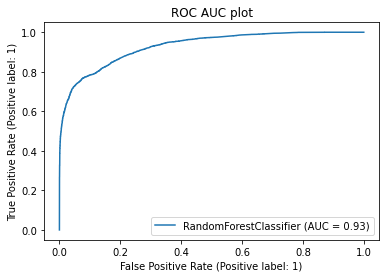

In [263]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Auc score is 93% and final accuracy is 84.2%

# Saving the model in pickle format

In [264]:
import joblib
joblib.dump(GCV.best_estimator_,"Census_income_final.pkl")

['Census_income_final.pkl']